In [196]:
%load_ext autoreload
%autoreload 2
from lab.postprocessing.toolbox import *
from lab.postprocessing.visualization import *
from lab.data.datasets import BlobDataset
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import torch
import os
import numpy as np
import sklearn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
result_dir = '/home/iai/user/conrads/rnn-cnn/results'

In [142]:
def plot_data(dataset):
    input = dataset.input
    target = dataset.target
    class1 = input[target == 0]
    class2 = input[target == 1]

    plt.scatter(class1[:, 0], class1[:, 1], c='darkred', s=.1, label='class 1')
    plt.scatter(class2[:, 0], class2[:, 1], c='midnightblue', s=.1, label='class 2')
    plt.legend()
    plt.xlim(-3.5, 4.5)
    plt.ylim(-3.5, 4.5)
    plt.xticks([])
    plt.yticks([])

# custom colormap
cw = cm.get_cmap('coolwarm', 1000)
CMAP = ListedColormap(cw(np.linspace(0, 1, 1000)[300:700]))

# points to evaluate
POINTS = get_grid_points(-3.5, 4.5, -3.5, 4.5, step_size=.01)

def plot_decision(logits):
    y = torch.argmax(logits, dim=-1)

    plt.figure(figsize=(7, 5), dpi=150)

    y = torch.nn.functional.softmax(logits, dim=1)[:, 0]
    plt.scatter(POINTS[:, 0], POINTS[:, 1], c=y.cpu(), s=5, cmap=CMAP)
    cbar = plt.colorbar()
    cbar.set_label('probability of class 1')
    
def plot_recs(final_steps):
    plt.figure(figsize=(5, 5), dpi=150)
    plt.scatter(POINTS[:, 0][final_steps == 0],
                POINTS[:, 1][final_steps == 0],
                c='white', s=5, label='1 recurrence')
    plt.scatter(POINTS[:, 0][final_steps == 1],
                POINTS[:, 1][final_steps == 1],
                c='bisque', s=5, label='2 recurrences')

# Data

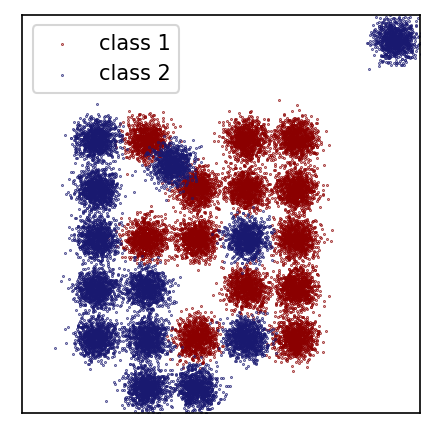

In [144]:
dataset = BlobDataset(device='cpu', seed=1, modified=False)
plt.figure(figsize=(3, 3), dpi=150)
plot_data(dataset)
plt.tight_layout()
plt.savefig(os.path.join(result_dir, 'images/blob_data.svg'))

In [178]:
metrics_mlp = []

model_dir = 'blob-hard/mlp/_model_layer_dims_(2, 2)'
metrics_mlp.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

model_dir = 'blob-hard/mlp/_model_layer_dims_(2, 2, 2)'
metrics_mlp.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

model_dir = 'blob-hard/mlp/_model_layer_dims_(2, 2, 2, 2)'
metrics_mlp.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

model_dir = 'blob-hard/mlp/_model_layer_dims_(2, 2, 2, 2, 2)'
metrics_mlp.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

model_dir = 'blob-hard/mlp/_model_layer_dims_(2, 2, 2, 2, 2, 2)'
metrics_mlp.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

In [225]:
metrics_rnn_thresh = []
model_dir = 'blob-hard/rnn/_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.7'
metrics_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

model_dir = 'blob-hard/rnn/_model_rnn_type_myrnn1_model_stopping_criterion_threshold_model_threshold_0.7'
metrics_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

model_dir = 'blob-hard/rnn/_model_max_rec_3_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.7'
metrics_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

model_dir = 'blob-hard/rnn/_model_max_rec_3_model_rnn_type_myrnn1_model_stopping_criterion_threshold_model_threshold_0.7'
metrics_rnn_thresh.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))



StopIteration: 

In [180]:
metrics_rnn_learn = []

model_dir = 'blob-hard/rnn/_model_rnn_type_myrnn1_model_stopping_criterion_learnable_model_learnable_target_first_correct_model_rec_fn_type_rbf'
metrics_rnn_learn.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

model_dir = 'blob-hard/rnn/_model_rnn_type_myrnn1_model_stopping_criterion_learnable_model_learnable_target_first_correct_model_rec_fn_type_mlp'
metrics_rnn_learn.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

model_dir = 'blob-hard/rnn/_model_rnn_type_myrnn1_model_stopping_criterion_learnable_model_learnable_target_none_model_rec_fn_type_rbf'
metrics_rnn_learn.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

model_dir = 'blob-hard/rnn/_model_rnn_type_myrnn1_model_stopping_criterion_learnable_model_learnable_target_none_model_rec_fn_type_mlp'
metrics_rnn_learn.append(load_and_evaluate_dir(result_dir, model_dir, full_return=True))

In [181]:
metrics_rnn_reg = []

crit_estim = sklearn.linear_model.LogisticRegression()
#crit_estim = sklearn.tree.DecisionTreeClassifier(max_depth=5)

model_dir = 'blob-hard/rnn/_model_rnn_type_linear_model_stopping_criterion_first_correct'
metrics_rnn_reg.append(load_and_evaluate_dir(result_dir, model_dir, crit_estim, full_return=True))

#model_dir = 'blob-hard/rnn/_model_rnn_type_myrnn1_model_stopping_criterion_first_correct'
#metrics_rnn_reg.append(load_and_evaluate_dir(result_dir, model_dir, crit_estim))

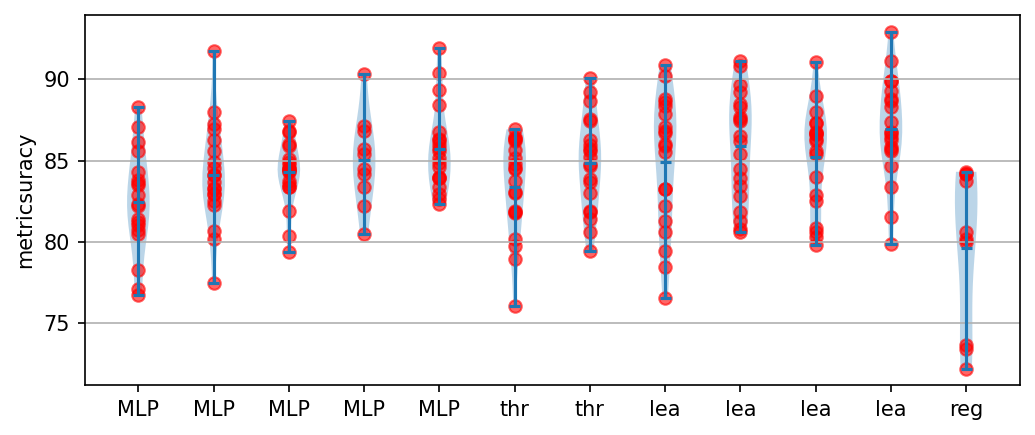

In [192]:
plt.figure(figsize=(7, 3), dpi=150)

metrics = metrics_mlp + metrics_rnn_thresh + metrics_rnn_learn + metrics_rnn_reg

accs = [metric_tuple[0] for metric_tuple in metrics]
make_violin_plot(accs)

plt.xticks(range(len(accs)), ['MLP'] * len(metrics_mlp) + 
           ['thr'] * len(metrics_rnn_thresh) + 
           ['lea'] * len(metrics_rnn_learn) + 
           ['reg'] * len(metrics_rnn_reg))
plt.ylabel('metricsuracy')
plt.tight_layout()
plt.grid(visible=True, axis='y')
plt.savefig(os.path.join(result_dir, 'images/blob_violin.svg'))

In [ ]:
plt.figure(figsize=(7, 3), dpi=150)

accs = acc_mlp + acc_rnn_thresh + acc_rnn_learn + acc_rnn_reg
make_violin_plot(accs)

plt.xticks(range(len(accs)), ['MLP'] * len(acc_mlp) + 
           ['thr'] * len(acc_rnn_thresh) + 
           ['lea'] * len(acc_rnn_learn) + 
           ['reg'] * len(acc_rnn_reg))
plt.ylabel('accuracy')
plt.tight_layout()
plt.grid(visible=True, axis='y')
#plt.savefig(os.path.join(result_dir, 'images/blob_violin'))

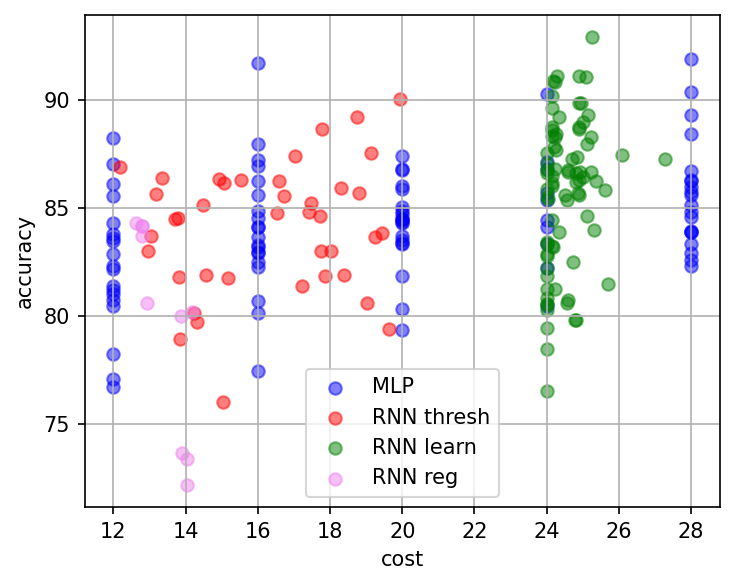

In [220]:
plt.figure(figsize=(5, 4), dpi=150)

plot_acc_over_cost([metrics_mlp, metrics_rnn_thresh, metrics_rnn_learn, metrics_rnn_reg],
                   ['MLP', 'RNN thresh', 'RNN learn', 'RNN reg'])
plt.show()

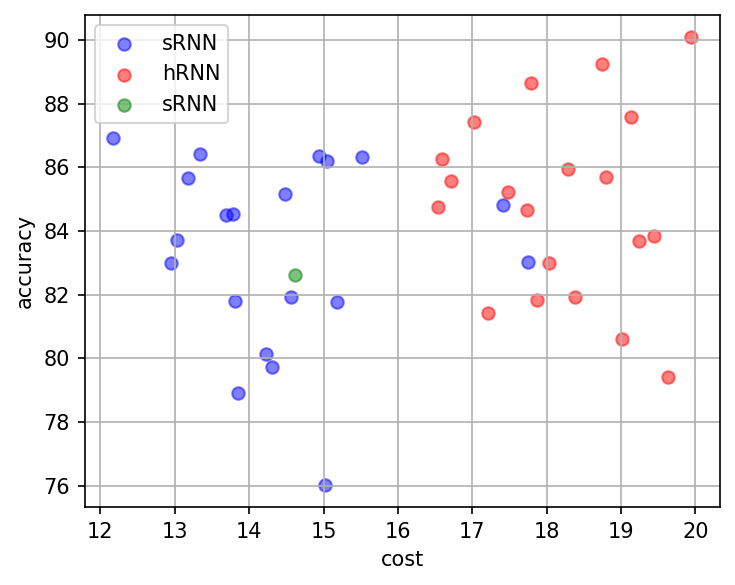

In [226]:
plt.figure(figsize=(5, 4), dpi=150)

plot_acc_over_cost([[metrics] for metrics in metrics_rnn_thresh],
                   ['sRNN $T=2$', 'hRNN $T=2$', 'sRNN $T=3$', 'hRNN, $T=3$'])
plt.show()

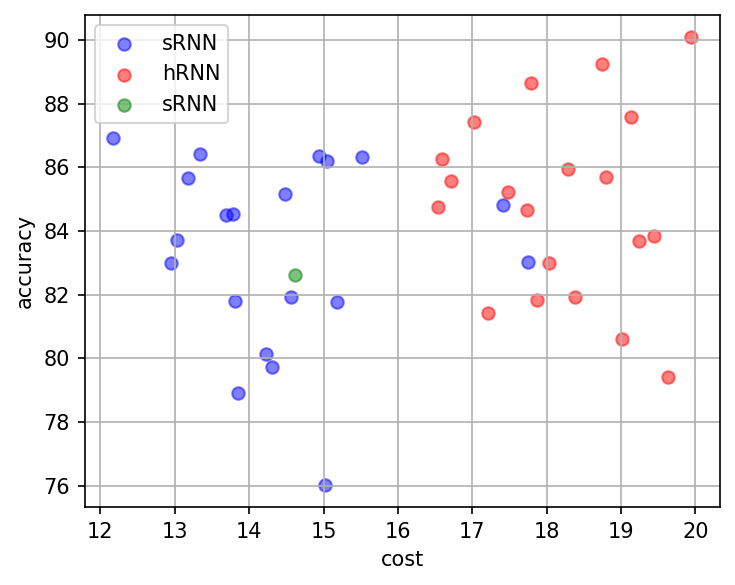

In [226]:
plt.figure(figsize=(5, 4), dpi=150)

plot_acc_over_cost([[metrics] for metrics in metrics_rnn_learn],
                   ['sRNN $T=2$', 'hRNN $T=2$', 'sRNN $T=3$', 'hRNN, $T=3$'])
plt.show()

# MLP 3 layers

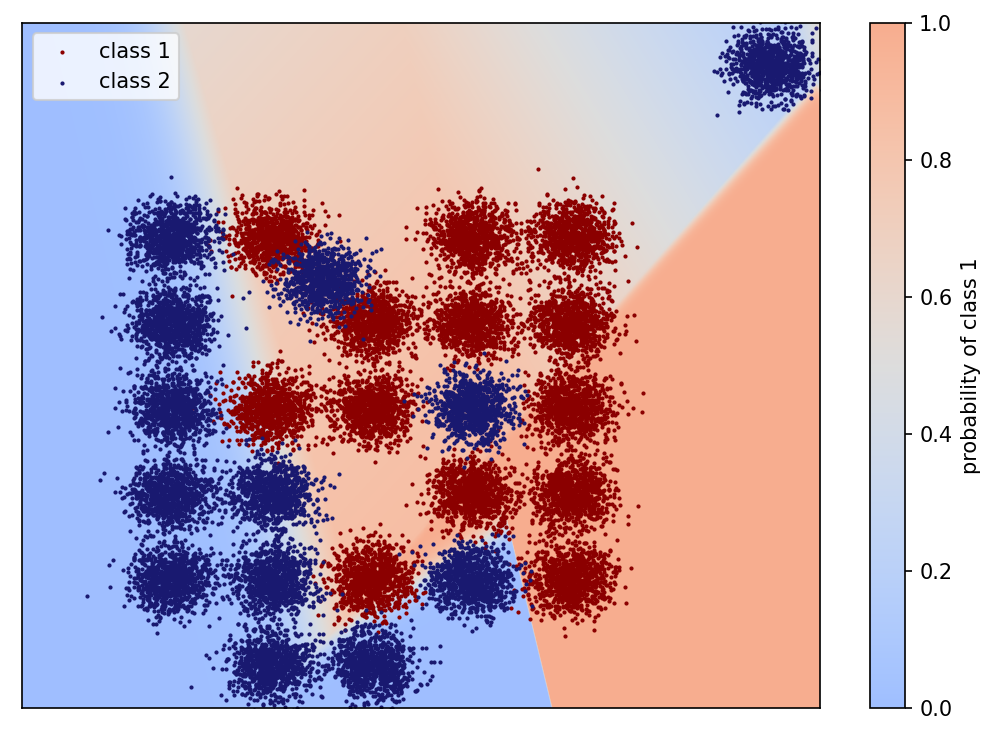

In [9]:
model_name = 'blob-hard/mlp/_model_layer_dims_(2, 2)/0805-154035'

model, loader = load_model(result_dir, model_name)

# evaluate model for all points in the plane
logits = model(POINTS.to(model.device))
plot_decision(logits)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blob_mlp3'))

# MLP 4 layers

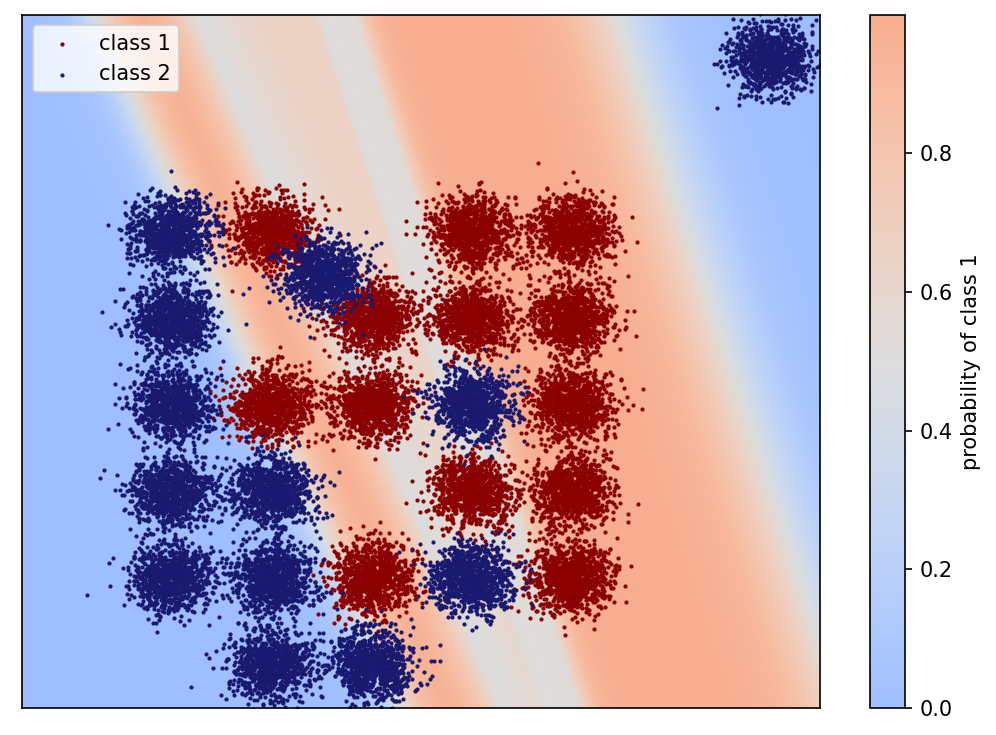

In [12]:
model_name = 'blob-hard/mlp/_model_layer_dims_(2, 2, 2)/0805-161418'

model, loader = load_model(result_dir, model_name)

# evaluate model for all points in the plane
logits = model(POINTS.to(model.device))
plot_decision(logits)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blob_mlp4'))

# RNN


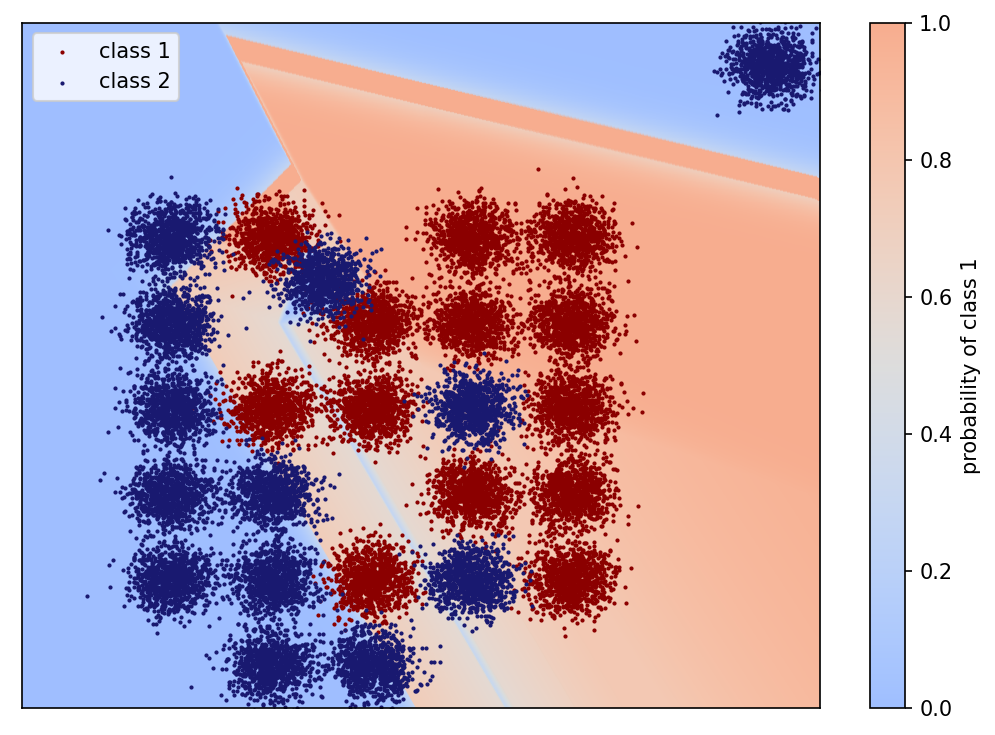

In [58]:
result_dir = '/home/iai/user/conrads/rnn-cnn/results'
model_name = 'blob-hard/rnn/_model_rnn_type_myrnn1_model_stopping_criterion_threshold_model_threshold_0.7/0805-174123'

model, _ = load_model(result_dir, model_name)

logits_stacked = model(POINTS.to(model.device))
final_steps = model.get_final_steps(POINTS.to(model.device), logits_stacked, None, evaluate=True)
logits = model.get_final_logits(logits_stacked, final_steps)

plot_decision(logits)
plot_data(dataset)
plt.tight_layout()
plt.savefig(os.path.join(result_dir, 'images/blobmod_rnn_dec'))

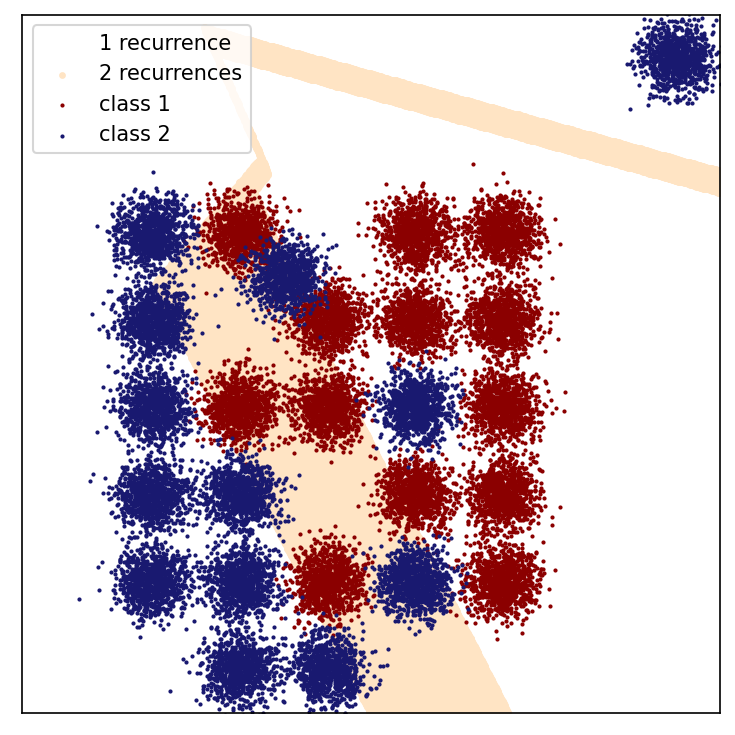

In [59]:
plot_recs(final_steps)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blob_rnn_rec'))

training estimator
testing estimator
recurrence estimator test accuracy: 0.9161538461538462
accuracy: 91.61538321238297


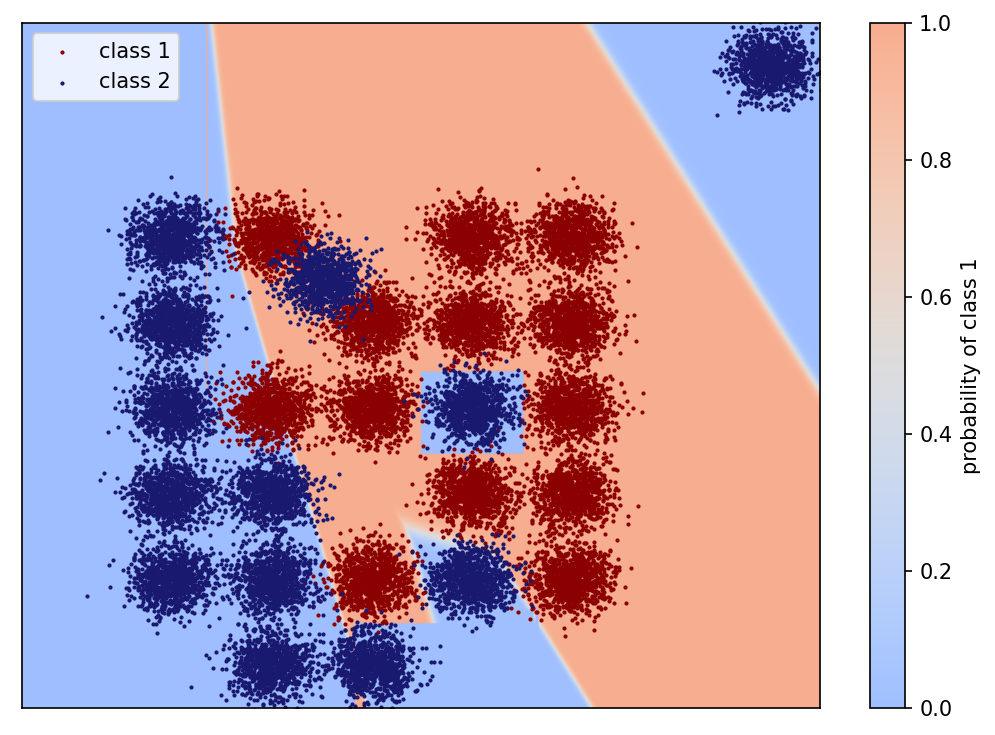

In [111]:
result_dir = '/home/iai/user/conrads/rnn-cnn/results'
model_name = 'blob-hard/rnn/_model_rnn_type_linear_model_stopping_criterion_first_correct/0808-115452'

model, loader = load_model(result_dir, model_name)

from sklearn import tree
crit_estim = tree.DecisionTreeClassifier(max_depth=5)
#crit_estim = sklearn.linear_model.LogisticRegression(random_state=3)
crit_estim = get_recurrence_estimator(model, loader, crit_estim, verbose=True)
model.crit_estim = crit_estim

acc, ce, steps = evaluate(model, loader.valid)
print('accuracy:', acc)

logits_stacked = model(POINTS.to(model.device))
final_steps = model.get_final_steps(POINTS.to(model.device), logits_stacked, None, evaluate=True)
logits = model.get_final_logits(logits_stacked, final_steps)

plot_decision(logits)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blobmod_rnn_dec'))

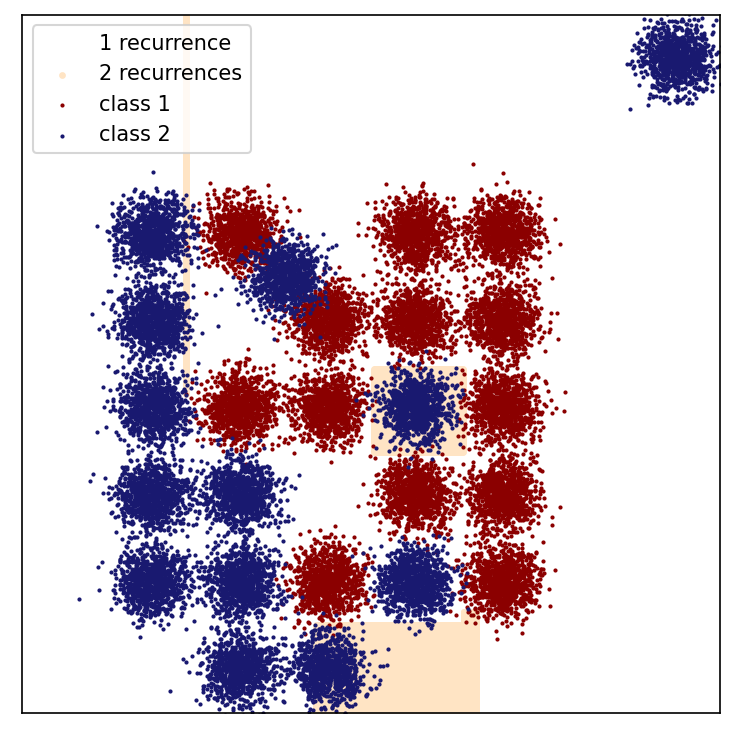

In [112]:
plot_recs(final_steps)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blob_rnn_rec'))

accuracy: 86.84615194797516
ops: tensor(24.2323)


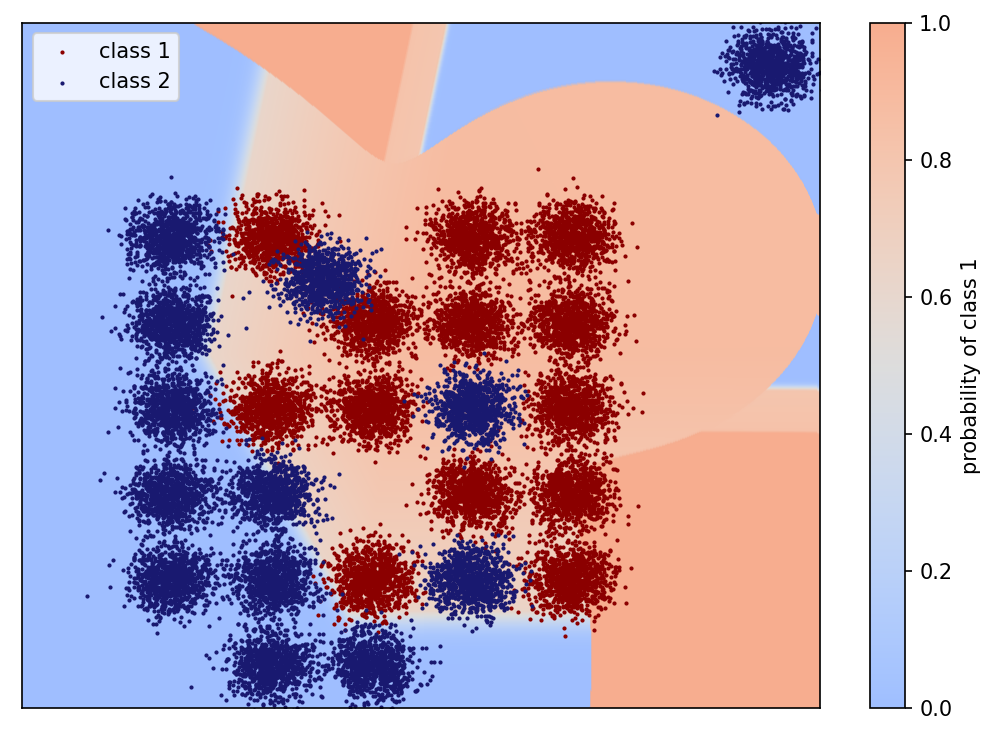

In [119]:
result_dir = '/home/iai/user/conrads/rnn-cnn/results'
model_name = 'blob-hard/rnn/_model_rnn_type_myrnn1_model_stopping_criterion_learnable_model_learnable_target_first_correct_model_rec_fn_type_rbf/0808-134630'

model, loader = load_model(result_dir, model_name)

acc, ce, steps = evaluate(model, loader.valid)
print('accuracy:', acc)
print('ops:', steps)

logits_stacked = model(POINTS.to(model.device))
final_steps = model.get_final_steps(POINTS.to(model.device), logits_stacked, None, evaluate=True)
logits = model.get_final_logits(logits_stacked, final_steps)

plot_decision(logits)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blobmod_rnn_dec'))

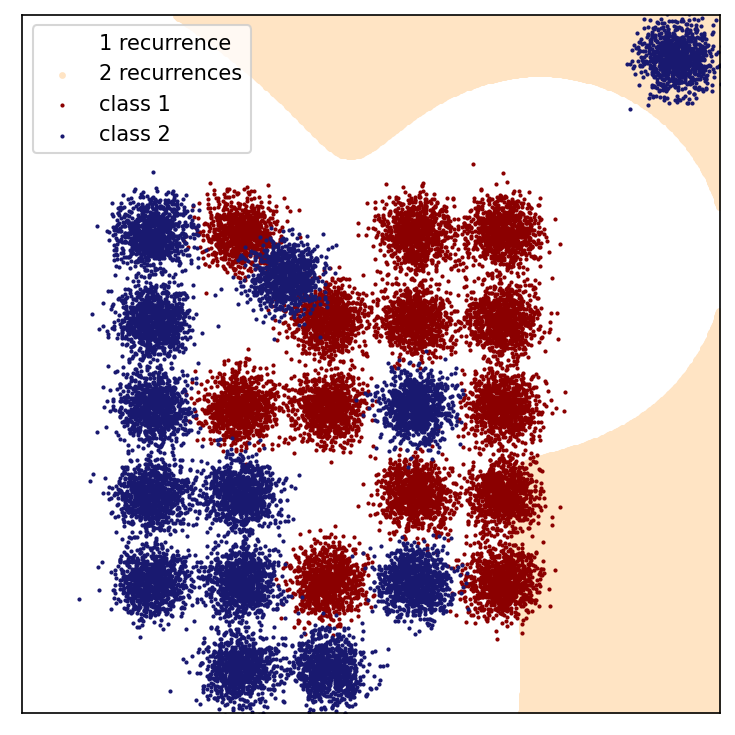

In [120]:
plot_recs(final_steps)
plot_data(dataset)
plt.tight_layout()
#plt.savefig(os.path.join(result_dir, 'images/blob_rnn_rec'))

In [63]:
make_table(result_dir, model_type='blob-hard/mlp')

\begin{center}
\begin{tabular}{ |c||c|c|c|c c|c c| }
\hline
 & & & & best & best & cheapest & cheapest \\
model & ACC & CE & OPS & ACC & OPS & ACC & OPS \\
\hline
_model_layer_dims_(2, 2) & 81.67 \pm  2.99 &  0.38 \pm  0.05 &  12.00 \pm  0.00 &  88.27 &  12.00 &  81.04 &  12.00 \\
\hline
_model_layer_dims_(2, 2, 2) & 84.61 \pm  1.92 &  0.33 \pm  0.03 &  16.00 \pm  0.00 &  87.23 &  16.00 &  86.27 &  16.00 \\
\hline
_model_layer_dims_(2, 2, 2, 2) & 83.82 \pm  2.60 &  0.34 \pm  0.05 &  20.00 \pm  0.00 &  87.42 &  20.00 &  87.42 &  20.00 \\
\hline
\end{tabular}
\end{center}


In [65]:
make_table(result_dir, model_type='blob-hard/rnn', crit_estim=sklearn.linear_model.LogisticRegression())

\begin{center}
\begin{tabular}{ |c||c|c|c|c c|c c| }
\hline
 & & & & best & best & cheapest & cheapest \\
model & ACC & CE & OPS & ACC & OPS & ACC & OPS \\
\hline
_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.7 & 83.24 \pm  1.79 &  0.33 \pm  0.01 &  14.97 \pm  1.32 &  86.12 &  13.58 &  86.12 &  13.58 \\
\hline
_model_rnn_type_linear_model_stopping_criterion_threshold_model_threshold_0.9 & 84.00 \pm  1.32 &  0.35 \pm  0.02 &  17.53 \pm  0.33 &  86.00 &  17.23 &  86.00 &  17.23 \\
\hline
_model_rnn_type_myrnn1_model_stopping_criterion_threshold_model_threshold_0.7 & 83.87 \pm  2.91 &  0.35 \pm  0.04 &  18.45 \pm  0.86 &  88.65 &  17.78 &  86.27 &  16.60 \\
\hline
\end{tabular}
\end{center}


In [134]:
x_train, _, y_train = get_final_steps_data(model, loader.train)
x_test, _, y_test = get_final_steps_data(model, loader.test)
clf = sklearn.tree.DecisionTreeClassifier(max_depth=5)
#clf = sklearn.linear_model.LogisticRegression()
clf.fit(x_train.cpu(), y_train.cpu())
acc = clf.score(x_test.cpu(), y_test.cpu())
print('accuracy of classifier:', acc)
#print('number of nodes:', clf.tree_.node_count)

accuracy of classifier: 0.9111538461538462
